In [1]:
# SABADO

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression

In [18]:
import pandas as pd
import random
import math

def generar_registros(n=8):
    registros = []

    for _ in range(n):
        x1 = random.randint(1, 100)  # Genera un número aleatorio entre 1 y 100 para x1
        x2 = random.randint(1, 100)  # Genera un número aleatorio entre 1 y 100 para x2
        y = x1 + (5 * math.sqrt(x2))  # Calcula y según la fórmula

        registros.append([x1, x2, y])

    df = pd.DataFrame(registros, columns=['x1', 'x2', 'y'])
    return df

# Genera un DataFrame con 8 registros
dataframe = generar_registros()
print(dataframe)

    x1  x2           y
0   30   3   38.660254
1   75  70  116.833001
2   37  76   80.588989
3   54  34   83.154759
4   54  52   90.055513
5  100  39  131.224990
6   12  46   45.911650
7   84   6   96.247449


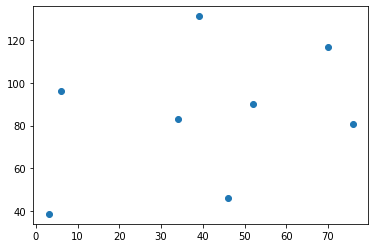

In [19]:
plt.scatter(x = dataframe['x2'], y = dataframe['y'])

In [20]:
# Separamos en train y test

train = dataframe.iloc[:6]
test = dataframe.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [21]:
test_X

,x1,x2
6,12,46
7,84,6


In [22]:
test

,x1,x2,y
6,12,46,45.911650
7,84,6,96.247449


In [23]:
#  verificacmos si la regresión lineal puede predecir correctamente

m1 = LinearRegression()
fit1 = m1.fit(train_X, train_y)
preds = fit1.predict(test_X)
print(f"\n{preds}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")


[40.84006551 99.54893352]
RMSE: 4.2790635839964395



In [24]:
# Las predicciones no son malas, pero hagamos algunos cálculos sobre las características de entrada para mejorar
# ¿Qué pasa si sacamos la raíz cuadrada de X2 y multiplicamos por 2?

train_X.x2 = 5 * (train_X.x2**(1/2))

test_X.x2 = 5 * (test_X.x2**(1/2))

print(test_X)

m2 = LinearRegression()

fit2 = m2.fit(train_X, train_y)

preds = fit2.predict(test_X)

print(f"\n{preds}")

print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")
     

   x1         x2
6  12  33.911650
7  84  12.247449

[45.91164992 96.24744871]
RMSE: 2.2469334198890888e-14



In [26]:
# Restauremos los datos a sus valores originales y hagámoslo mediante transformadores personalizados mediante canalización.

train = dataframe.iloc[:6]
test = dataframe.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [28]:
# Creamos una clase transformadora

#__init__: este es el constructor. Se llama cuando se inicializa el pipeline.
#fit(): Se llama cuando hacemos fit en el pipeline.
#transform(): se llama cuando usamos fit o transform en el pipeline

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('\n>>>>>>>init() called.\n')

  def fit(self, X, y = None):
    print('\n>>>>>>>fit() called.\n')
    return self

  def transform(self, X, y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy() # creamos una copia para evitar cambios en el conjunto de datos original
    X_.x2 = 5 * np.sqrt(X_.x2)
    return X_
     

In [29]:
# con transformation de entradas

print("create pipeline 2")
pipe2 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()),    # esto dispara una llamda a __init__
                       ('linear_model', LinearRegression())
])

# una sintaxis alternativa y más corta para hacer lo anterior, sin nombrar cada paso, es:
#pipe2 = make_pipeline(ExperimentalTransformer(), LinearRegression())

print("fit pipeline 2")
pipe2.fit(train_X, train_y)

print("predict via pipeline 2")
preds2 = pipe2.predict(test_X)

print(f"\n{preds2}")  # should be [14. 17.]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n")


create pipeline 2

>>>>>>>init() called.

fit pipeline 2

>>>>>>>fit() called.


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[45.91164992 96.24744871]
RMSE: 2.2469334198890888e-14

